# Deep Learning (AI5100)
## Assignment 1

<b>Name</b> - Sayanta Adhikari </br>
<b>Roll No</b> - AI22MTECH12005

In [3]:
# Importing Modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
np.random.seed(33)

#### Question 1: <i>Perceptron Learning Algorithm</i>

In [2]:
# Generating Linearly separable data

def data_generation(mean1, mean2, std1, std2, margin, dim = 2, n_samples = 1000):
    # generates data and return two numpy array  with data and labels
    if margin >= np.linalg.norm(mean1-mean2):
        raise RuntimeError() ## Raise error if this condition is not true
    c1, c2 = [], []
    d = (np.linalg.norm(mean1 - mean2) - margin) / 2.0
    while len(c1) <= n_samples and len(c2) <= n_samples:
        sample1 = std1 * np.random.randn(2) + mean1
        while np.linalg.norm(mean1 - sample1) > d:
            sample1 = std1 * np.random.randn(2) + mean1
        c1.append(sample1)
        sample2 = std2 * np.random.randn(2) + mean2
        while np.linalg.norm(mean2 - sample2) > d:
            sample2 = std2 * np.random.randn(2) + mean2
        c2.append(sample2)

    c1 = np.array(c1); c1 = c1[:n_samples, :]
    c2 = np.array(c2); c2 = c2[:n_samples, :]
    x = np.zeros((2 * n_samples, 3)) + 1
    x[::2, :2] = c1
    x[1::2, :2] = c2

    y = np.zeros((2 * n_samples, 1))
    y[::2, :] = 1.0
    y[1::2, :] = -1.0
    
    return x, y

In [3]:
# Perceptron Learning Algorithm

def perceptron(x, y):
    n_changes = 0; changes = False
    w = np.zeros((x.shape[1], 1))
    while not changes: # Runs until nicely classified 
        loop_change = 0
        for i in range(len(x)):
            if np.dot(x[i, :], w) * y[i] <= 0: # Check if any wrong classification is done or not
                w += y[i] * x[i, :].reshape(-1, 1) # Update step
                n_changes += 1; loop_change +=1
            if loop_change == 0:
                changes = True
    return w, n_changes

In [4]:
# For ploting graph

def plot_graph(X, title, xlabel, ylabel,  W = np.zeros((3, 1)), after_train = False, dontplot = False):
    x = np.linspace(X[:, 0].min(),X[:, 0].max(),100)
    if after_train:
        y = -(W[0]/W[1]) * x - (W[2]/W[1])
    else:
        y = np.zeros((100, 1))
    plt.figure()
    if not dontplot:
        plt.plot(x, y, '-r', label='Classifier')
    plt.scatter(X[::2, 0], X[::2, 1], )
    plt.scatter(X[1::2, 0], X[1::2, 1])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if not dontplot:
        plt.legend()
    plt.show()

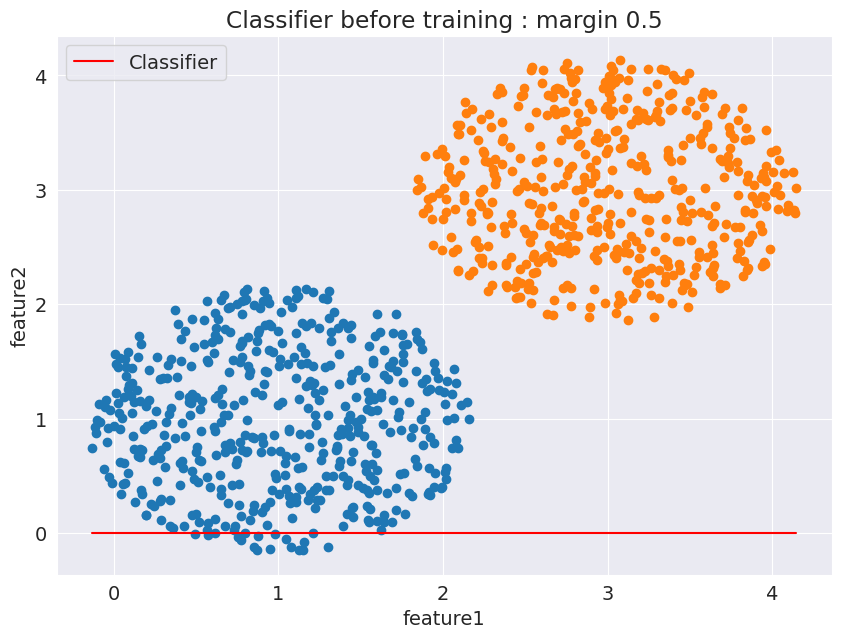

In [5]:
# Data generation and plotting

X, Y = data_generation(mean1=np.array([1,1]), mean2=np.array([3,3]), std1=2, std2=2, 
                    margin=0.5, dim=2, n_samples=500)
plot_graph(X, title='Classifier before training : margin 0.5',
             xlabel='feature1', ylabel='feature2')

In [6]:
# Training
W, n = perceptron(X, Y)

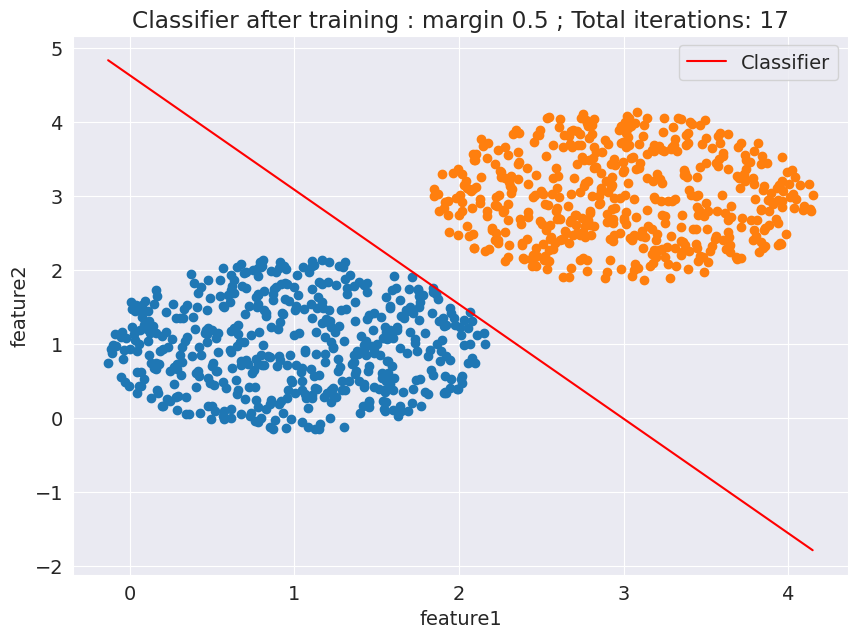

In [7]:
# Plotting after Training

plot_graph(X, title=f'Classifier after training : margin 0.5 ; Total iterations: {n}', 
                 xlabel='feature1', ylabel='feature2', W=W, after_train=True)

In [8]:
# Experimental Setup

margin_arr = [0.25, 0.5, 1.0, 1.5, 2.0]
mean_arr1 = np.array([[3, 3] for _ in range(len(margin_arr))])
mean_arr2 = np.array([[7, 7] for _ in range(len(margin_arr))])
std_arr1 = [2 for _ in range(len(margin_arr))]
std_arr2 = [1 for _ in range(len(margin_arr))]
DIM = 2
N_SAMPLES = 500

For margin : 0.25 average iterations required is 157.2
For margin : 0.5 average iterations required is 142.4
For margin : 1.0 average iterations required is 65.0
For margin : 1.5 average iterations required is 61.6
For margin : 2.0 average iterations required is 50.0


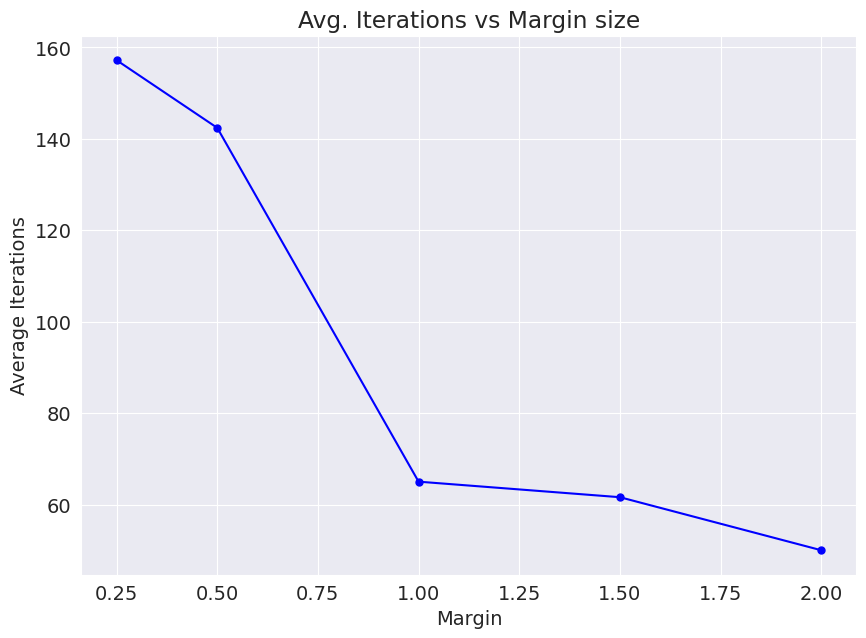

In [10]:
# Main Experiments

avg_n = []
for i in range(len(margin_arr)):
    nn = []
    for j in range(5):
        X, Y = data_generation(mean1=mean_arr1[i], mean2=mean_arr2[i], std1=std_arr1[i], std2=std_arr2[i], 
                                margin=margin_arr[i], dim=DIM, n_samples=N_SAMPLES)
        W, n = perceptron(X, Y)
        nn.append(n)
    avg_n.append(sum(nn)/len(nn))

# Producing Results
for d, k in zip(margin_arr, avg_n):
    print(f'For margin : {d} average iterations required is {k}')

plt.plot(margin_arr, avg_n, 'b.-', markersize = 10)
plt.xlabel("Margin")
plt.ylabel("Average Iterations")
plt.title("Avg. Iterations vs Margin size")
plt.show()

I have used <i> Random Normal samples </i> for generating the dataset and then performed the experiments.<br>
I have considered similar mean and variance for all the different cases and kept on changing the margin (decreasing the margin). <br>
In this setup I observed that:<br>
<p> From the above experimental results we can see that as the value of the margin decreases the time required for Perceptron to converge is increasing (Number of iterations required increases). The experimental results are presented in the output of the above cell.</p>

#### Question 2: <i>Gradient Descent  for training a Linear Classifier</i>

Implemented Linear Classifier which is trained using Gradient Descent. I have used sigmoid to get probability at the output and used Binary Cross Entropy Loss as my loss function. I have analytically calculated the gradient and used it in this implementation

In [17]:
class LinearClassifier():
    """ Linear Classifier trained with Gradient Descent """
    def __init__(self, lr=0.1, epochs=1000) -> None:
        self.lr = lr
        self.epochs = epochs
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def BCELoss(self, true_label, pred_label):
        """ Binary Cross Entropy Loss """
        loss = 0
        for i in range(len(true_label)):
            if pred_label[i] == 0:  ex1 = 0
            else: ex1 = np.log2(pred_label[i])

            if pred_label[i] == 1: ex2 = 0
            else: ex2 = np.log2(1 - pred_label[i])
            
            temp = true_label[i] * ex1 + (1 - true_label[i]) * ex2
            loss += temp/len(true_label)
        return -1 * loss

    def grad(self, X, y, pred):
        return X.T @ (pred - y) # Analytically calculated the Gradient and used the formula

    def fit(self, X, y):
        los = []
        self.W = np.random.randn(X.shape[1]).reshape(-1, 1)
        for e in range(self.epochs):
            pred = self.predict(X) # Calculating Prediction
            loss = self.BCELoss(y, pred) # Calculating Loss 

            self.W -= self.lr * self.grad(X, y, pred) # Doing Update. Performing Gradient Descent

            upred = self.predict(X) # Claculating updated prediction
            uloss = self.BCELoss(y, pred) # Calculating updated loss

            # if uloss < 0.005: # Early Stopping
            #     break
            los.append(uloss)
            if e % 5 == 0:
                print(f'Epoch: {e} -> Loss: Before Update: {loss} After Update: {uloss}')
        print("========================")
        print("Training complete!")
        self.plot(los)
                

    def predict(self, X):
        return self.sigmoid(X @ self.W)
    
    def get_weight(self):
        return self.W

    def plot(self, loss):
        plt.plot(loss[20:])
        plt.ylabel("Loss")
        plt.title("Loss vs. Epochs")
        plt.xlabel("epochs")
        plt.show()
    

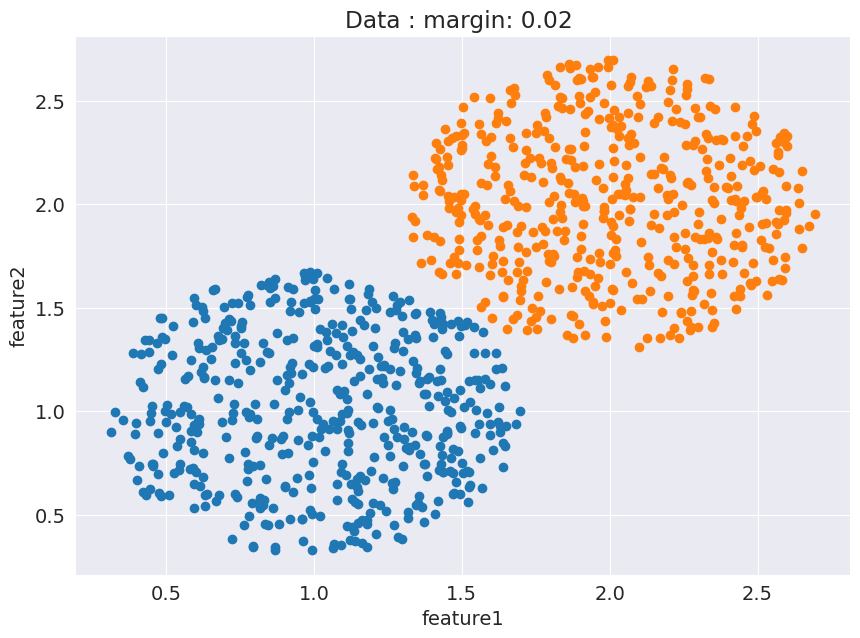

In [18]:
# Generating Linearly separable data and plotting the dataset
margin = 0.02
X, Y = data_generation(mean1=np.array([1,1]), mean2=np.array([2,2]), std1=2, std2=2, 
                    margin=margin, dim=2, n_samples=500)
Y = (Y + 1)/2 # Transforming Y form {1, -1} to {1, 0}

plot_graph(X, title=f'Data : margin: {margin} ',
             xlabel='feature1', ylabel='feature2', dontplot=True)

Epoch: 0 -> Loss: Before Update: [1.16558836] After Update: [1.16558836]
Epoch: 5 -> Loss: Before Update: [90.98795172] After Update: [90.98795172]
Epoch: 10 -> Loss: Before Update: [2.03827399] After Update: [2.03827399]
Epoch: 15 -> Loss: Before Update: [10.11887395] After Update: [10.11887395]
Epoch: 20 -> Loss: Before Update: [0.63767626] After Update: [0.63767626]
Epoch: 25 -> Loss: Before Update: [0.00047682] After Update: [0.00047682]
Epoch: 30 -> Loss: Before Update: [0.00042734] After Update: [0.00042734]
Epoch: 35 -> Loss: Before Update: [0.00041807] After Update: [0.00041807]
Epoch: 40 -> Loss: Before Update: [0.0004162] After Update: [0.0004162]
Epoch: 45 -> Loss: Before Update: [0.00041579] After Update: [0.00041579]
Epoch: 50 -> Loss: Before Update: [0.00041567] After Update: [0.00041567]
Epoch: 55 -> Loss: Before Update: [0.00041561] After Update: [0.00041561]
Epoch: 60 -> Loss: Before Update: [0.00041556] After Update: [0.00041556]
Epoch: 65 -> Loss: Before Update: [0.0

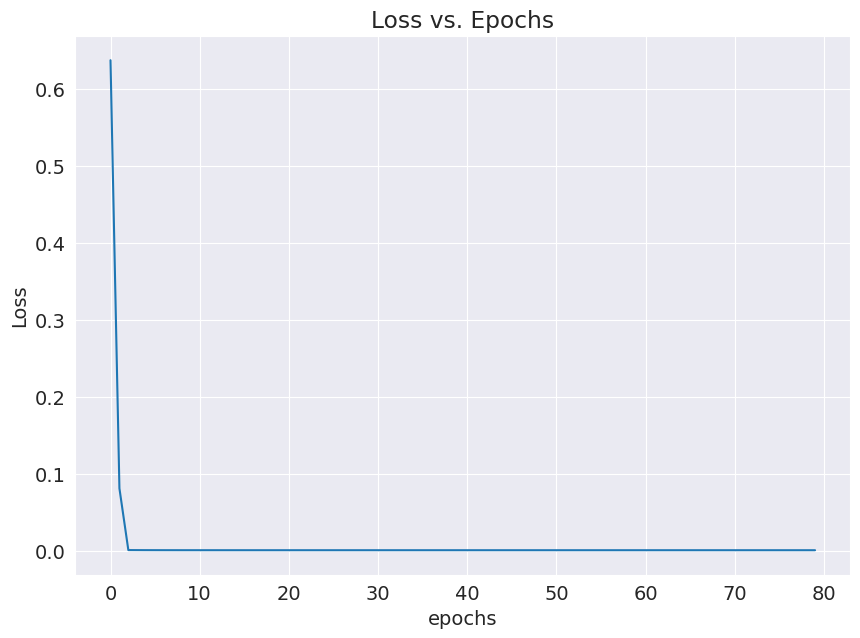

In [20]:
# Model Initialization and Training
model = LinearClassifier(epochs=100)
model.fit(X, Y)

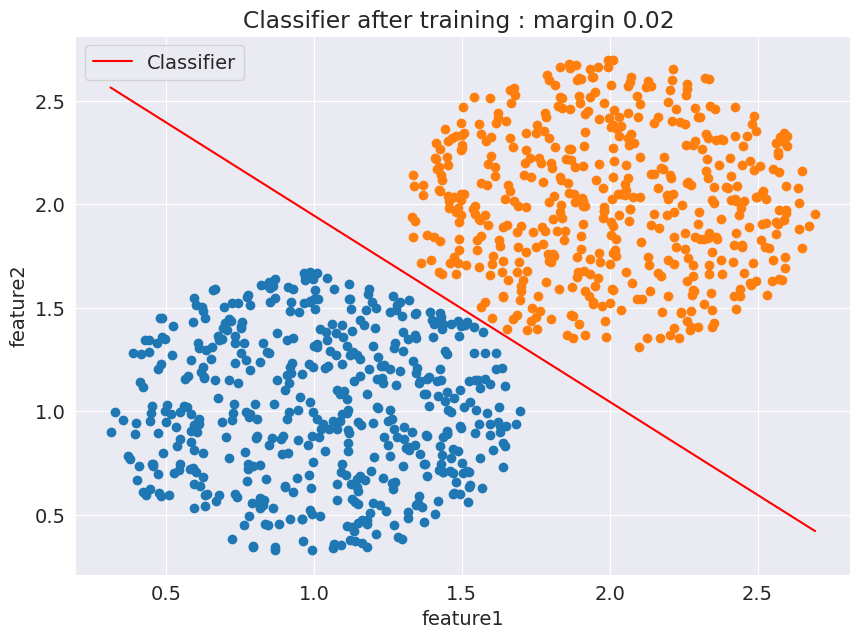

In [21]:
# Plotting the classifier along with dataset
W = model.get_weight()
plot_graph(X, title=f'Classifier after training : margin {margin} ', 
                 xlabel='feature1', ylabel='feature2', W=W, after_train=True)

#### Question 3: <i>MLP with single Hidden Layer </i>

Implemented a Multilayered Perceptron, where you can provide the number of layers and Size of each hidden layers.<br>
Implemented Back-propagation to train the network.

In [7]:
class MLP(object):
    """ A Multilayer Perceptron class. This MLP is trained using Stochastic Gradient Descent """

    def __init__(self, num_inputs: int=3, hidden_layers: list=[3], num_outputs: int=2):

        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        layers = [num_inputs] + hidden_layers + [num_outputs]

        self.W = [np.random.rand(layers[i], layers[i + 1]) for i in range(len(layers) - 1)] # Weights for all layers
        self.bias = [np.zeros(layers[i + 1]) for i in range(len(layers) - 1)] # Bias for all layers
        self.grad_w = [np.zeros((layers[i], layers[i + 1])) for i in range(len(layers) - 1)] # Derivative wrt weights
        self.grad_b = [np.zeros(layers[i + 1]) for i in range(len(layers) - 1)] # Derivatives wrt bias
        self.activations = [np.zeros(layers[i]) for i in range(len(layers))] # Outputs from each layer
        

    def forward(self, inputs):
        """ Forward Pass """
        self.activations[0] = activations = inputs
        for i, w in enumerate(self.W):
            net_inputs = np.dot(activations, w) #+ self.bias[i]
            activations = self.sigmoid(net_inputs)
            self.activations[i + 1] = activations

        return activations


    def backward(self, error):
        """ Backprobagation """
        for i in reversed(range(len(self.grad_w))):
            activations = self.activations[i+1]
            delta = error * self.sigmoid(activations, grad=True) # Upstream Gradient * Layer Gradient to get the required gradient
            delta_re = delta.reshape(delta.shape[0], -1).T
            current_activations = self.activations[i]
            current_activations = current_activations.reshape(current_activations.shape[0],-1)
            self.grad_w[i] = np.dot(current_activations, delta_re) # Storing gradient for weights
            self.grad_b[i] = delta # Storing Gradient for Bias
            error = np.dot(delta, self.W[i].T) # Passing Error gradient to the Previous Layers


    def train(self, inputs, targets, epochs=1000, learning_rate=0.01):
        """ Training """
        loss_list = []; epoch_list = []
        for i in range(epochs):
            sum_errors = 0
            # Performing Updates for each examples at a time
            for j, input in enumerate(inputs):
                target = targets[j]
                output = self.forward(input) # Forward Pass
                error = -target/output + (1 - target)/(1 - output)
                self.backward(error) # Backward Pass
                self.update_step(learning_rate) # Update Step
                sum_errors += self.BCELoss(target, output)
            
            if i % 10 == 0:
                print(f"EPOCH {i+1}: ERROR: {sum_errors / len(inputs)}")
                loss_list.append(sum_errors / len(inputs))
                epoch_list.append(i+1)

        self.plot_loss_vs_epochs(loss_list, epoch_list)
        print("Training complete!")
        print("=====")


    def update_step(self, learningRate=1):
        """ Update Step """
        for i in range(len(self.W)):
            weights = self.W[i]
            # bias = self.bias[i]
            grad = self.grad_w[i]
            # grad_b = self.grad_b[i]
            weights -= grad * learningRate # Updating the weights
            # bias -= grad_b * learningRate # Updating the Bias


    def sigmoid(self, x, grad=False):
        """ Sigmoid and its derivative """
        if grad:
            return x * (1.0 - x)
        return 1.0 / (1 + np.exp(-x))


    def BCELoss(self, true_label, pred_label):
        """ Binary Cross Entropy Loss """
        loss = 0
        for i in range(len(true_label)):
            if pred_label[i] == 0:  ex1 = 0
            else:   ex1 = np.log2(pred_label[i])

            if pred_label[i] == 1: ex2 = 0
            else: ex2 = np.log2(1 - pred_label[i])
            
            temp = true_label[i] * ex1 + (1 - true_label[i]) * ex2
            loss += temp/len(true_label)
        return -1 * loss

    def predict(self, X):
        """ Prediction Function """
        pred = self.forward(X) # Forward Pass
        return np.where(pred > 0.5, 1, 0) # Thresholding

    def plot_loss_vs_epochs(self, loss_list, epoch_list):
        """ Plot of loss vs. epochs """
        plt.plot(epoch_list, loss_list)
        plt.title("Loss vs Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()


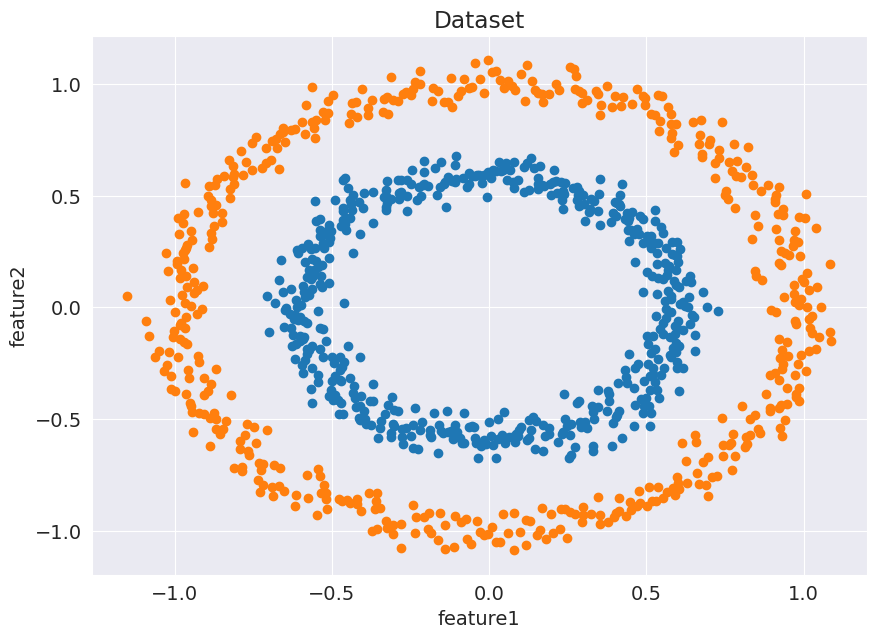

In [8]:
# Concentric circle data generation

def concentric_circles(n_classes: int = 2, radii: list = [12, 20], n_samples = 500):
    noise = np.random.randn(n_samples)
    x1 = (radii[0] + noise) * np.cos(np.linspace(0, 2*np.pi, n_samples))
    x2 = ((radii[0] + noise) * np.sin(np.linspace(0, 2*np.pi, n_samples)))
    x_in = np.vstack([x1/20, x2/20])
    plt.scatter(x1/20, x2/20)
    noise = np.random.randn(n_samples)
    x1 = (radii[1] + noise) * np.cos(np.linspace(0, 2*np.pi, n_samples))
    x2 = (radii[1] + noise) * np.sin(np.linspace(0, 2*np.pi, n_samples))
    x_out = np.vstack([x1/20, x2/20])
    plt.scatter(x1/20, x2/20)
    X = np.ones([2, 2 * n_samples])
    Y = np.zeros([1, 2 * n_samples])
    X[:2, ::2] = x_in
    X[:2, 1::2] = x_out
    Y[:, ::2] = 1
    Y[:, 1::2] = 0
    plt.xlabel("feature1")
    plt.ylabel("feature2")
    plt.title("Dataset")
    return X.reshape(-1, 2), Y.reshape(-1, 1)

X, Y = concentric_circles()

EPOCH 1: ERROR: 1.028106439465629
EPOCH 11: ERROR: 1.0217506900222397
EPOCH 21: ERROR: 1.0211874950402828
EPOCH 31: ERROR: 1.0209185774685186
EPOCH 41: ERROR: 1.0208020912770868
EPOCH 51: ERROR: 1.0207540084496207
EPOCH 61: ERROR: 1.0207345131942815
EPOCH 71: ERROR: 1.0207266163204056
EPOCH 81: ERROR: 1.0207233788377623
EPOCH 91: ERROR: 1.0207220118232259
EPOCH 101: ERROR: 1.0207213983113521
EPOCH 111: ERROR: 1.0207210895507117
EPOCH 121: ERROR: 1.020720903736458
EPOCH 131: ERROR: 1.0207207661212454
EPOCH 141: ERROR: 1.020720645206476
EPOCH 151: ERROR: 1.0207205271534605
EPOCH 161: ERROR: 1.0207204054373238
EPOCH 171: ERROR: 1.0207202766114616
EPOCH 181: ERROR: 1.0207201385414266
EPOCH 191: ERROR: 1.0207199896486734
EPOCH 201: ERROR: 1.0207198285742178
EPOCH 211: ERROR: 1.0207196540209695
EPOCH 221: ERROR: 1.0207194646742708
EPOCH 231: ERROR: 1.020719259157914
EPOCH 241: ERROR: 1.0207190360068117
EPOCH 251: ERROR: 1.020718793647709
EPOCH 261: ERROR: 1.0207185303838797
EPOCH 271: ERROR:

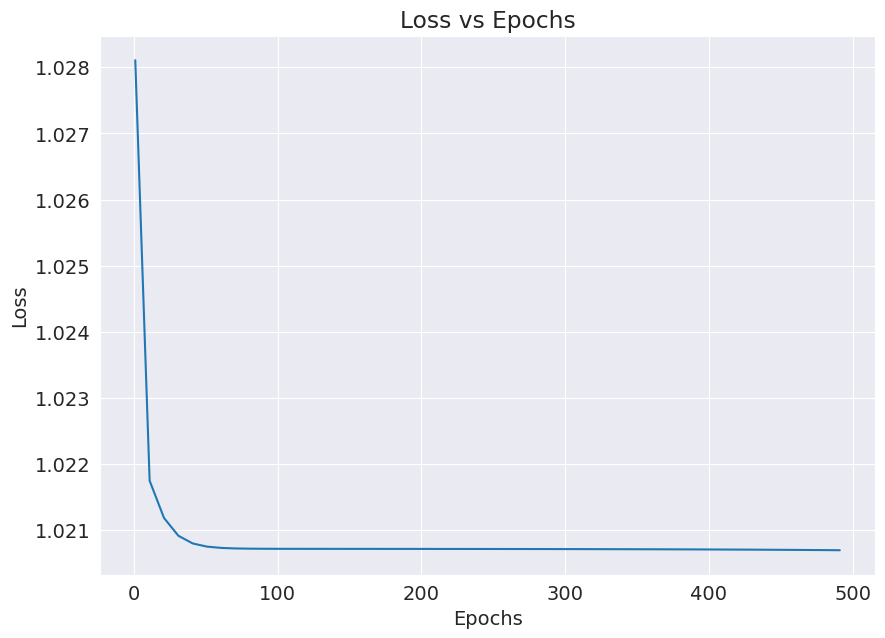

Training complete!
=====


In [9]:
mlp = MLP(2, [10], 1)
mlp.train(X, Y, epochs=500, learning_rate=0.09)